In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import convolve2d as conv2
from skimage import  color, data,io, restoration
import nibabel
import shutil
from mpl_toolkits import mplot3d



(111, 150, 170)
(111, 121, 121)


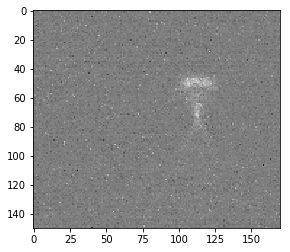

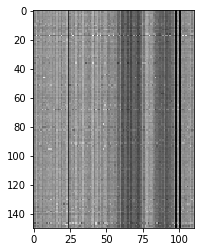

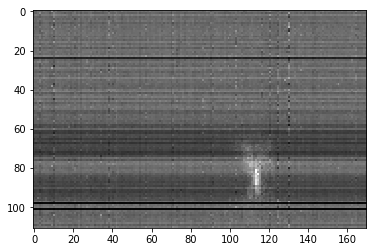

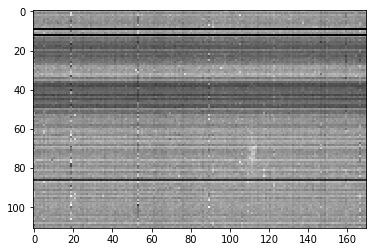

In [2]:
image = io.imread("centro.tif")
image_T = image.T
image_vertical = image[10:250,50:200,50:220]
image_vertical_rot = np.rot90(image_vertical,axes=(-1,0))
image_vertical_rot_a = np.rot90(image_vertical,axes=(1,0))
image_vertical_rot_b = np.rot90(image_vertical,axes=(0, 1))
image_vertical_rot_c = np.rot90(image_vertical,axes=(0, -1))
                               
image_horizontal = image_T[110:221, 43:164, 0:300]

x = image_horizontal[:,0,0]
y = image_horizontal[0,:,0]
z = image_horizontal[0,0,:]

#plt.figure()
#ax = plt.axes(projection='3d')
#plt.scatter(x,z)
#ax.scatter3D(x,y,z)

#print(image_horizontal.shape)
print(image_vertical.shape)
print(image_horizontal.shape)


#plt.imshow(image_horizontal[45], cmap ='gray')
#plt.show()

plt.imshow(image_vertical[45],cmap='gray')
plt.show()
plt.imshow(image_vertical_rot[45], cmap ='gray')
plt.show()
plt.imshow(image_vertical_rot_a[45], cmap ='gray')
plt.show()
plt.imshow(image_vertical_rot_b[45], cmap ='gray')
plt.show()
plt.imshow(image_vertical_rot_c[45], cmap='gray')



(111, 150, 170)
(111, 121, 121)


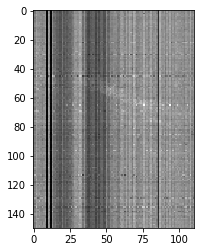

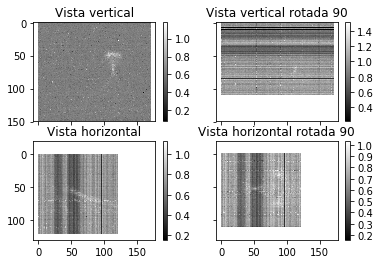

In [7]:

image = io.imread("centro.tif")
image_T = image.T
image_vertical = image[10:250,50:200,50:220]/100.0
image_vertical_rot = np.rot90(image_vertical,axes=(0, 1))
image_horizontal = image_T[110:221, 43:164, 0:300]/140
image_horizontal_rot = np.rot90(image_horizontal,axes=(0, 1))

x = image_horizontal[:,0,0]
y = image_horizontal[0,:,0]
z = image_horizontal[0,0,:]

#plt.figure()
#ax = plt.axes(projection='3d')
#plt.scatter(x,z)
#ax.scatter3D(x,y,z)

#print(image_horizontal.shape)
print(image_vertical.shape)
print(image_horizontal.shape)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')



cax3 = ax3.imshow(image_horizontal[45], cmap ='gray')
fig.colorbar(cax3 ,ax =ax3)
ax3.set_title('Vista horizontal')


cax4 = ax4.imshow(image_horizontal_rot[45], cmap ='gray')
fig.colorbar(cax4 ,ax =ax4)
ax4.set_title('Vista horizontal rotada 90')

cax2 = ax2.imshow(image_vertical_rot[45], cmap ='gray')
fig.colorbar(cax2 ,ax =ax2)
ax2.set_title('Vista vertical rotada 90')


cax1 = ax1.imshow(image_vertical[45],cmap='gray')
fig.colorbar(cax1 ,ax =ax1)
ax1.set_title('Vista vertical')


plt.savefig("resultado2.pdf")

plt.show()

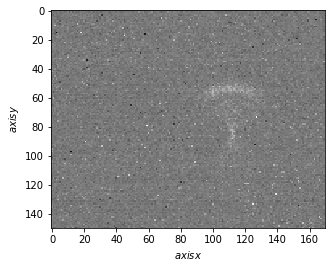

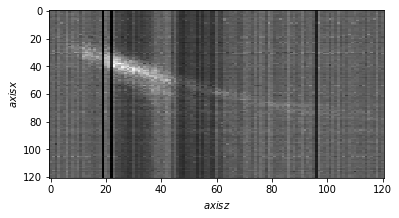

In [4]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

def view_horizontal(volume):
    remove_keymap_conflicts({'n', 'm'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index], aspect = '0.5',cmap='gray')
    plt.xlabel("$axis z$")
    plt.ylabel("$axis x$")
    fig.canvas.mpl_connect('key_press_event', process_key)

def view_vertical(volume):
    remove_keymap_conflicts({'n', 'm'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index], aspect = '0.9', cmap='gray')
    plt.xlabel("$axis x$")
    plt.ylabel("$axis y$")
    fig.canvas.mpl_connect('key_press_event', process_key)


#def view_vertical(volume):
#    remove_keymap_conflicts({'n', 'm'})
#    fig, (ax1,ax2) = plt.subpHYUBlots(1, 2, sharex = True)
#    volume2 = volume.T
#    ax1.volume = volume
#    ax2.volume = volume2
#    ax1.index = volume.shape[0] // 2
#    ax2.index = volume2.shape[0] // 2
#    ax1.imshow(volume[ax1.index], aspect = '0.5')
#    ax2.imshow(volume2[ax2.index], aspect = '0.5')
#    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'n':
        previous_slice(ax)
    elif event.key == 'm':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])


view_vertical(image_vertical)
view_horizontal(image_horizontal)
plt.show()

In [10]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()
plt.plot()

[]